1)Analyze the relationship between the type of 
cuisine and the restaurant's rating.2)
Identify the most popular cuisines amo g
customers based on the number of votes.
Determine if there are any specific cuisines
that tend to receive higher ratings.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('C:/Users/Administrator/Downloads/Dataset .csv')

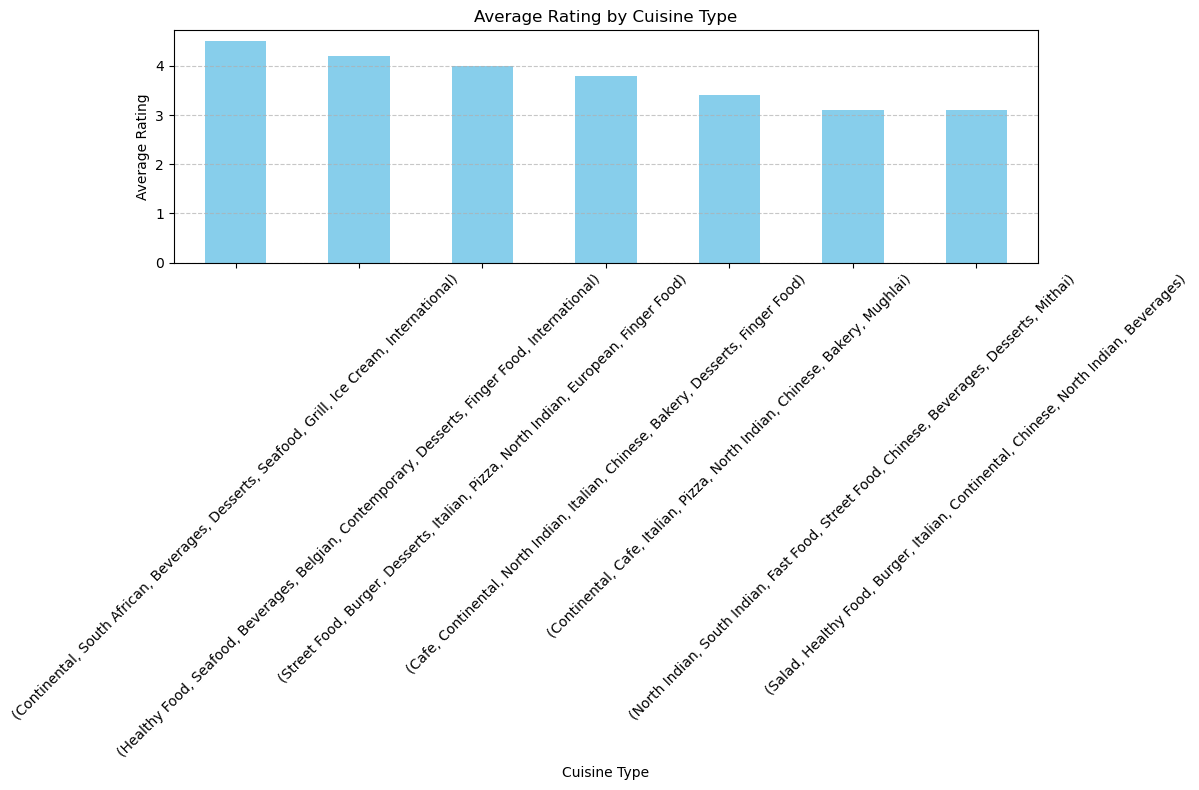

In [5]:
cuisine_data = data['Cuisines'].str.split(', ', expand=True).add_prefix('Cuisine_')

# Join the expanded cuisine data back to the original DataFrame
data_expanded = pd.concat([data, cuisine_data], axis=1)

# Group by cuisine columns and calculate average rating
cuisine_columns = [col for col in data_expanded.columns if col.startswith('Cuisine_')]
cuisine_ratings = data_expanded.groupby(cuisine_columns)['Aggregate rating'].mean().sort_values(ascending=False)

# Plotting the average ratings by cuisine
plt.figure(figsize=(12, 8))
cuisine_ratings.plot(kind='bar', color='skyblue')
plt.title('Average Rating by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

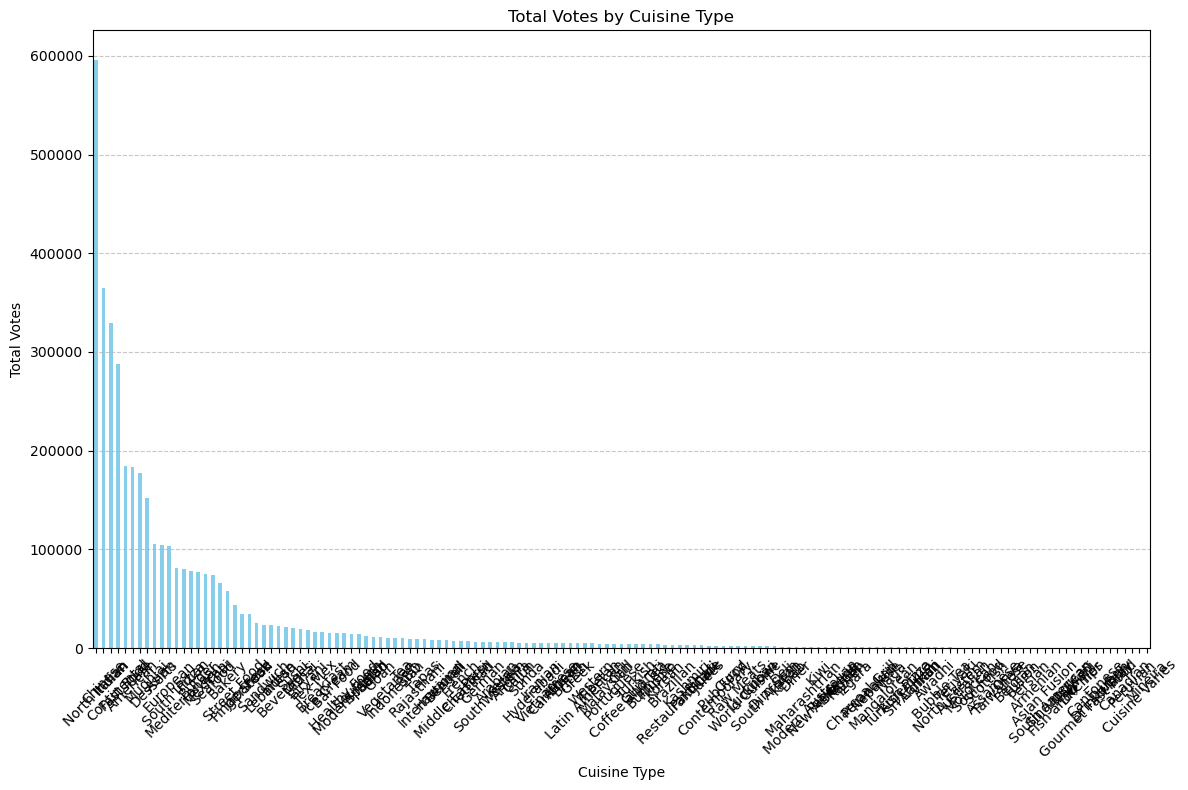

Top 5 Most Popular Cuisines based on Total Votes/Reviews:
Cuisine
North Indian    595981
Chinese         364351
Italian         329265
Continental     288255
Fast Food       184058
Name: Votes, dtype: int64


In [6]:
cuisine_data = data['Cuisines'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).rename('Cuisine')
data_expanded = data.join(cuisine_data)
cuisine_votes = data_expanded.groupby('Cuisine')['Votes'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
cuisine_votes.plot(kind='bar', color='skyblue')
plt.title('Total Votes by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Total Votes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
print("Top 5 Most Popular Cuisines based on Total Votes/Reviews:")
print(cuisine_votes.head(5))

In [7]:
print("Top 5 Highest-Rated Cuisines:")
print(cuisine_ratings.head(5))

Top 5 Highest-Rated Cuisines:
Cuisine_0     Cuisine_1      Cuisine_2     Cuisine_3  Cuisine_4     Cuisine_5     Cuisine_6    Cuisine_7    
Continental   South African  Beverages     Desserts   Seafood       Grill         Ice Cream    International    4.5
Healthy Food  Seafood        Beverages     Belgian    Contemporary  Desserts      Finger Food  International    4.2
Street Food   Burger         Desserts      Italian    Pizza         North Indian  European     Finger Food      4.0
Cafe          Continental    North Indian  Italian    Chinese       Bakery        Desserts     Finger Food      3.8
Continental   Cafe           Italian       Pizza      North Indian  Chinese       Bakery       Mughlai          3.4
Name: Aggregate rating, dtype: float64
